# Image Classification by K-Nearest Neighbors (KNN)

### Life cycle of Machine learning Project
-  Understanding the Problem Statement
-  Data Collection
-  Data Checks to perform
-  Exploratory data analysis
-  Data Pre-Processing
-  Model Training
-  Choose best model

## 1) Problem Statement 
Develop a K-Nearest Neighbors (KNN) classifier to predict the class labels of images in the Iris dataset. The task involves data preprocessing, model training, evaluation, and making predictions on new images.

## 2) Data Collection 
-  Use the Iris dataset.
-  Source of Dataset: https://www.kaggle.com/uciml/iris

**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**Importing Data**

In [2]:
dataset = pd.read_csv(r"Iris.csv")

## 3) Exploring Data

In [3]:
dataset.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


### 3.1 Checking the sample shape

In [4]:
dataset.shape

(150, 6)

### 3.2 Checking Presence of Null-Values

In [5]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**So No Null-Value Present**

### 3.3 The number of instances (rows) that belong to each class.

In [6]:
dataset['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### 3.4 Dividing the dataset into features and labels

As we can see dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: x (features) and y (labels).

In [7]:
x = dataset.iloc[ :, : -1].values
y = dataset["Species"].values

### 3.5 Label Encoding

As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

### 3.6 Spliting the data into train-test datasets

Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [10]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(120, 5) (120,) (30, 5) (30,)


## 4) Visualising the Data

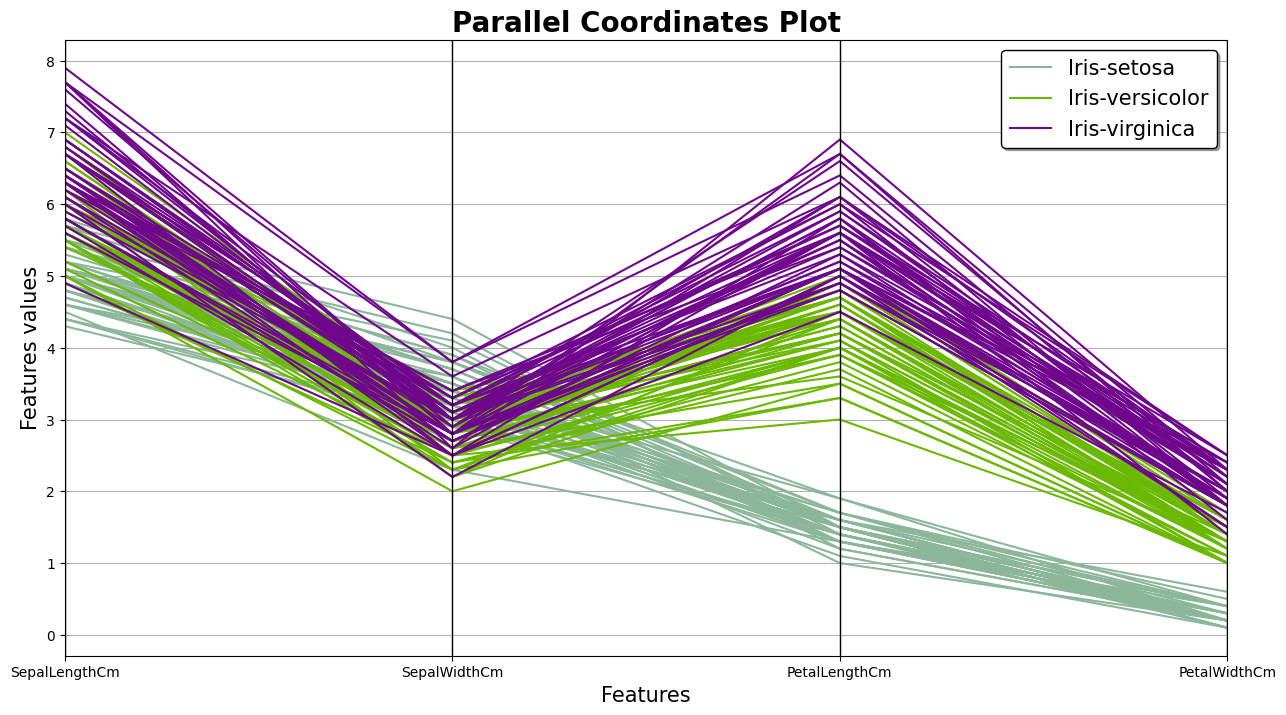

In [11]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15, 8))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

## 5) Data Saving

**Saving the Data to avoid redundancy**

In [12]:
np.save('train_data.npy', x_train)
np.save('train_labels.npy', y_train)
np.save('test_data.npy', x_test)
np.save('test_labels.npy', y_test)